In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Read our data to a Dataframe
final_df = pd.read_csv('NBA_Hollinger_Data.csv')
mvp_df = pd.read_csv('NBA_MVP_clean_data.csv')

### Visualize Hollinger theory

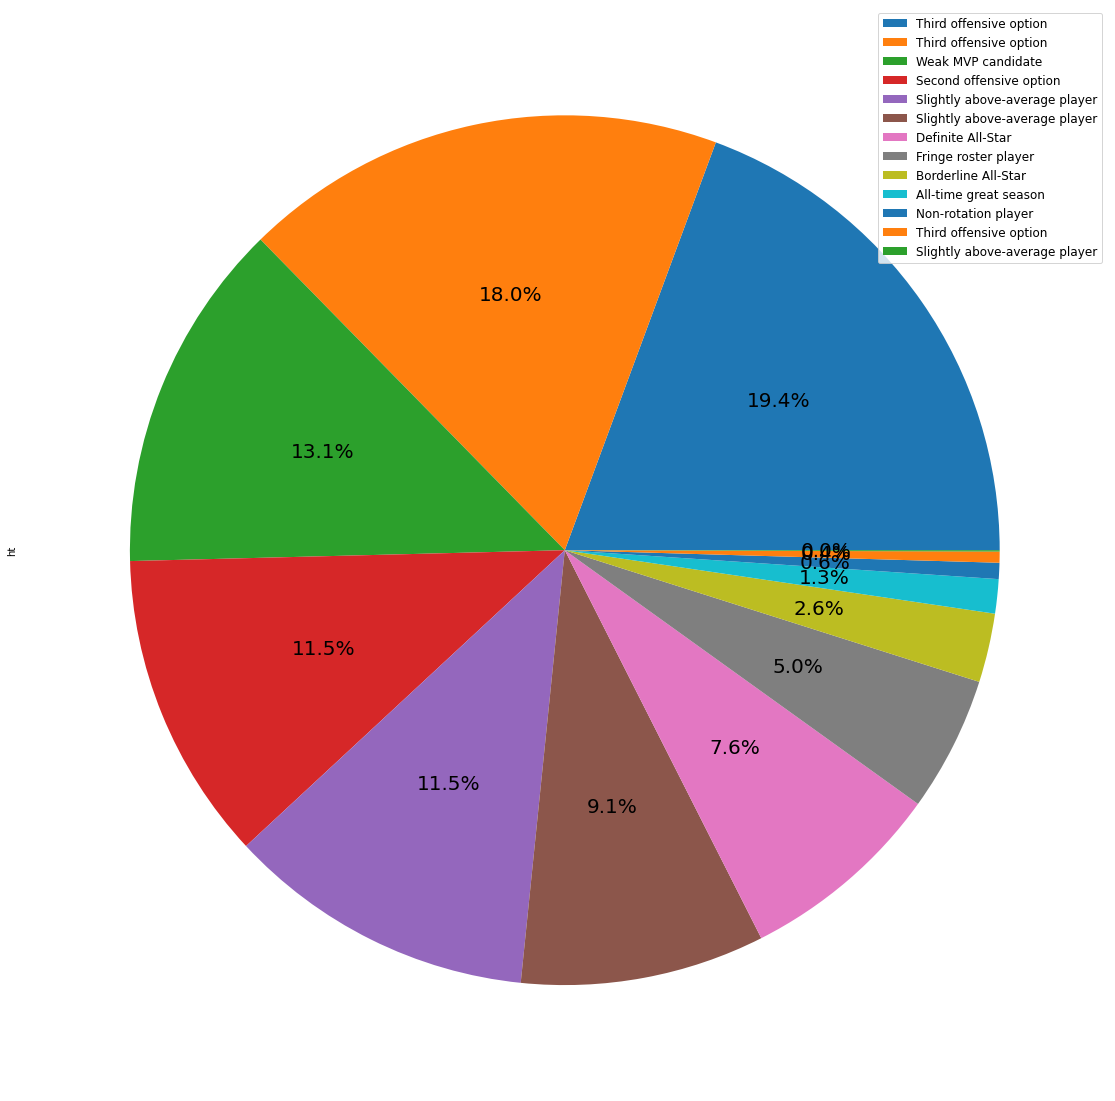

In [3]:
plt.figure(figsize=(35,20))
final_df['ht'].value_counts().plot(kind='pie',labels=None,autopct='%1.1f%%',textprops= {'fontsize':20})
plt.legend(fontsize=12,loc="upper right",labels=final_df['ht'])


### Visualize MVP

In [4]:
#Combine the 2 dataframes into 1 DataFrame
top_per = final_df.loc[final_df.groupby('Year')['PER'].idxmax()]
top_per = top_per.sort_values(by='Year',ascending=False)

top_per.insert(0,'MVP_This_Year',mvp_df['Player'].tolist())
top_per.reset_index()
top_per['Player'] = top_per['Player'].str.replace('*', '')
match = pd.get_dummies(top_per['Player']==top_per['MVP_This_Year'], drop_first=True)
top_per.insert(0,'We_Have_A_Match',match)






<AxesSubplot:xlabel='We_Have_A_Match', ylabel='Year'>

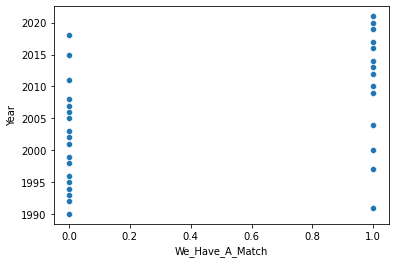

In [5]:
sns.scatterplot(data=top_per, y="Year", x="We_Have_A_Match")

([<matplotlib.patches.Wedge at 0x21b920a4730>,
 [Text(-0.21459935421774104, 1.0788638084435536, 'False'),
  Text(0.21459935421774115, -1.0788638084435536, 'True')])

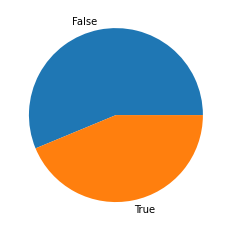

In [6]:
plt.pie(x=top_per['We_Have_A_Match'].value_counts(),labels=['False','True']) # ניתן לראות שבכמעט 50 אחוז הצלחה יהיה אפשר לנבא את השחקן המצטיין על סמך הנתונים השנתיים שלו

### Visualize Final Dataset

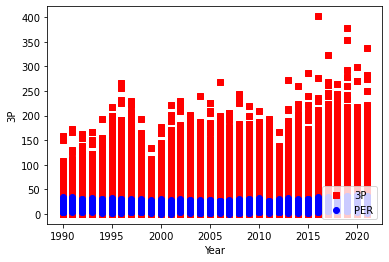

In [7]:
plt.scatter(x=final_df['Year'],y=final_df['3P'],c='r',marker='s',label='3P')
plt.scatter(x=final_df['Year'],y=final_df['PER'],c='b',marker='o',label='PER')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Year')
plt.ylabel('3P')
plt.show()

<AxesSubplot:xlabel='PER', ylabel='FG%'>

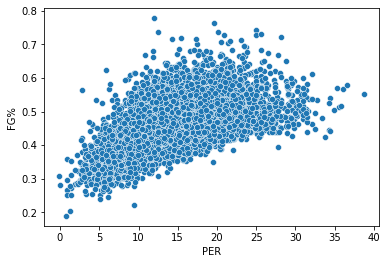

In [8]:
sns.scatterplot(data=final_df, y="FG%", x="PER")#ניתן לראות את ההשפעה החזקה מאוד של השלשות על הפיר, ככל שיותר שלשות נקלעו כך הפיר גדל נ

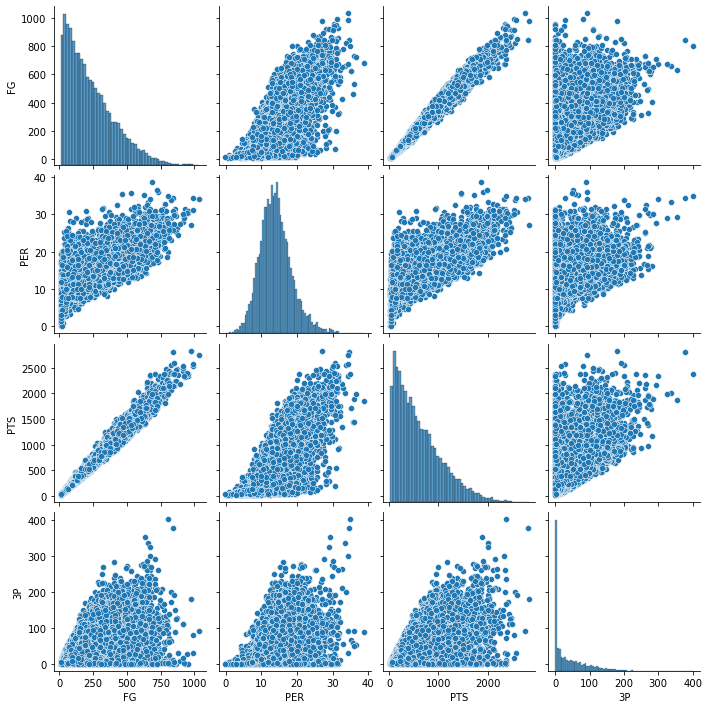

In [9]:
#We can visualize a correlation between PER to PTS ,FG, 3P
sns.pairplot(final_df[['FG','PER','PTS','3P']])

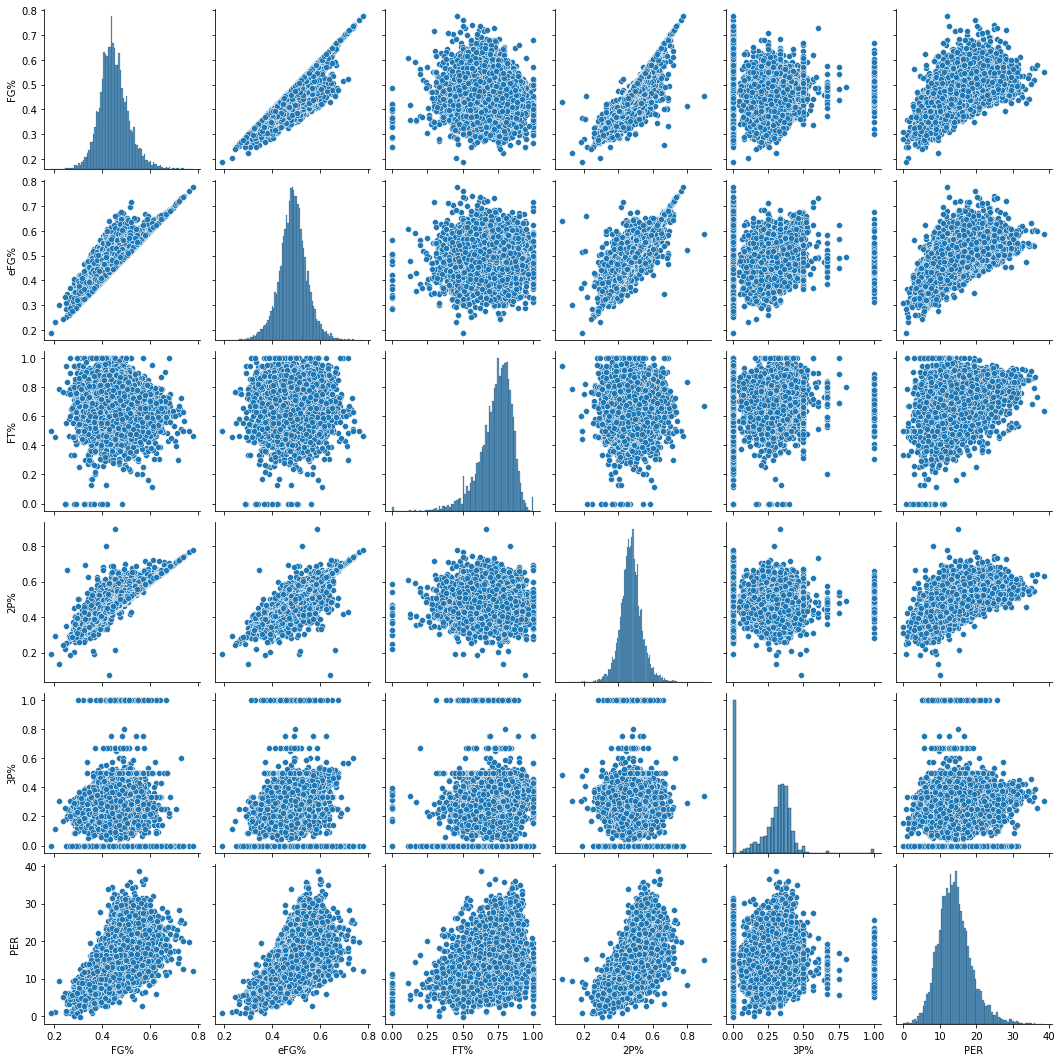

In [10]:
sns.pairplot(final_df[['FG%','eFG%','FT%','2P%','3P%','PER']])

### We can visualize the correlation between PER to other stats using a heatmap
### We will use that information to see which stats are most relevant for our model

<AxesSubplot:>

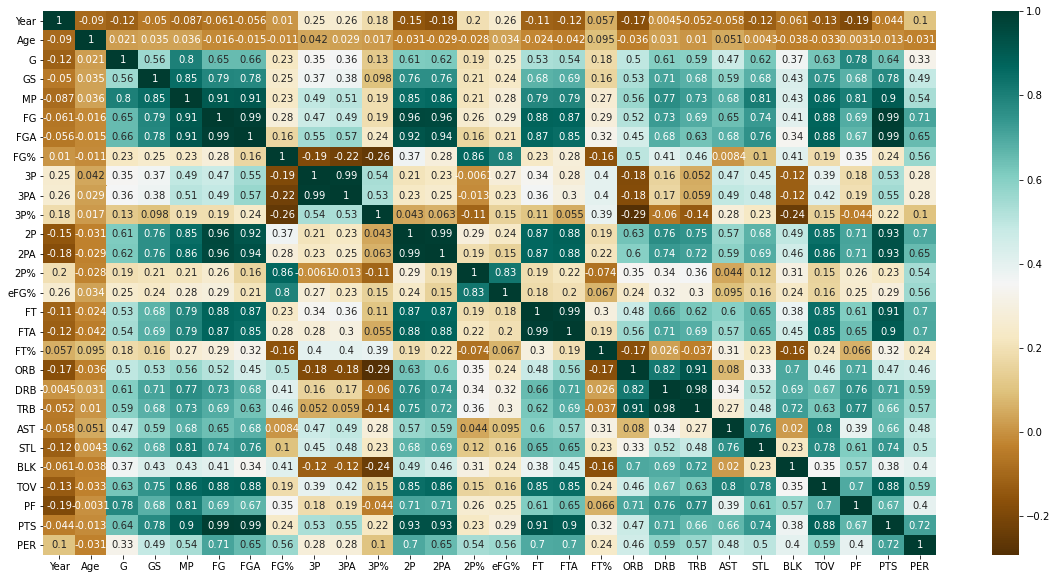

In [11]:
plt.figure(figsize=(20,10))
c= final_df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

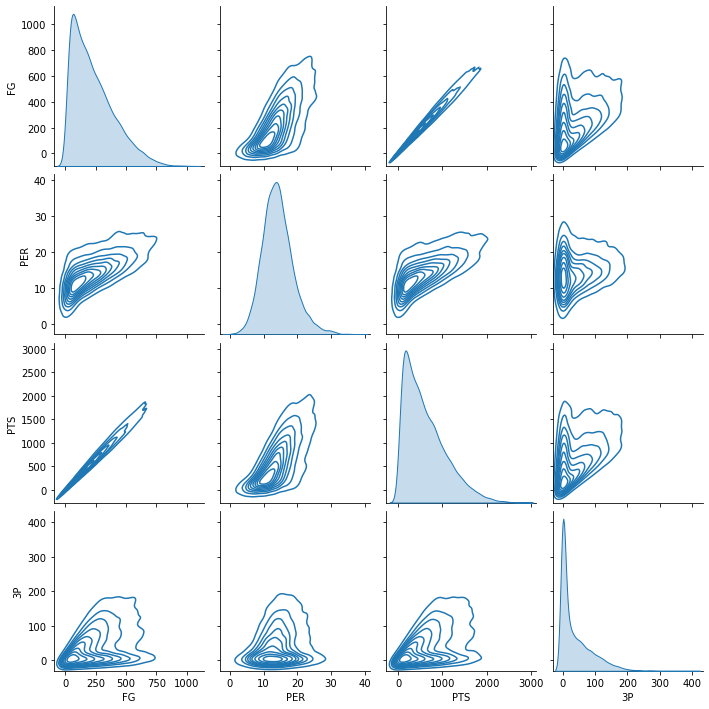

In [14]:
#We want to see a distibution of some of our data to choose our scalar
sns.pairplot(final_df[['FG','PER','PTS','3P']], kind='kde')